# SAMPLE CNN ARCHITECTURE IMPLEMENTED FOR MUSIC AUTO TAGGING

## Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf

from keras.models import load_model
import wave
import os
import glob
import librosa
import numpy as np
import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import (Conv1D, MaxPool1D, BatchNormalization, GlobalAvgPool1D, Multiply, GlobalMaxPool1D,
                                     Dense, Dropout, Activation, Reshape, Concatenate, Add)
from keras.layers import Input
from keras.utils import np_utils
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import load_model
import pandas as pd
from tensorflow.keras import Model
from keras.layers import InputLayer

Using TensorFlow backend.


## SAMPLE CNN ARCHITECTURE AS PROPOSED BY JONGPIL LEE

In [4]:

    kernel_initializer=tf.keras.initializers.GlorotUniform()
    activation=keras.activations.relu
    dropout_rate=0.1
    classifier = keras.Sequential()
    # 59049 X 1
    classifier.add(InputLayer(input_shape=(59049,1)))
    classifier.add(Conv1D(filters=128,kernel_size=3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))

    # 19683 X 128
    classifier.add(Conv1D(filters=128, kernel_size=3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 6561 X 128
    classifier.add(Conv1D(128, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 2187 X 128
    classifier.add(Conv1D(256, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 729 X 256
    classifier.add(Conv1D(256, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 243 X 256
    classifier.add(Conv1D(256, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 81 X 256
    classifier.add(Conv1D(256, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 27 X 256
    classifier.add(Conv1D(256, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 9 X 256
    classifier.add(Conv1D(256, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add(MaxPool1D(3))
    # 3 X 256
    classifier.add(Conv1D(512, 3, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    classifier.add( MaxPool1D(3))
    # 1 X 512
    classifier.add(Conv1D(512, 1, padding='same'))
    classifier.add(BatchNormalization())
    classifier.add(Activation(activation))
    # 1 X 512
    classifier.add(Dropout(dropout_rate))
    classifier.add(Flatten())
    classifier.add(Dense(units=50, activation='sigmoid'))
    classifier.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 59049, 128)        512       
_________________________________________________________________
batch_normalization_1 (Batch (None, 59049, 128)        512       
_________________________________________________________________
activation_1 (Activation)    (None, 59049, 128)        0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19683, 128)        0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 19683, 128)        49280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19683, 128)        512       
_________________________________________________________________
activation_2 (Activation)    (None, 19683, 128)       

## TRAINING

### Reshaping the training data to fit specifications of CONV1D

#### conv1d(batch_size,time_steps,input_dimensions)

In [8]:
from numpy import array
path ="/Users/noelalben/Desktop/VTU_PROJ/music_autotagging/songs_in_order"
X=[]
for filename in glob.glob(os.path.join(path, '*.wav')):
    x, fs = librosa.load(filename)
    temp=x[0:59049]
    y=[]
    y=temp.tolist()
    X.append(y)
len(X)
X=array(X)
type(X)
X[0].shape
X[0]
sample_size=X.shape[0]
time_steps=X.shape[1]
input_dim=1
X_reshaped=X.reshape(sample_size,time_steps,input_dim)

In [9]:
X_reshaped.shape

(30, 59049, 1)

## (30, 59049, 1)

### Acquiring outputs to train the model for 30 songs

In [11]:
out=pd.read_csv('/Users/noelalben/Desktop/VTU_PROJ/music_autotagging/soundoutput.csv')
out=out.to_numpy()

### Splitting the data into Training data and test data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, out, test_size=0.2, random_state=42)

### Adding a loss function and training the model

In [15]:
classifier.compile(loss='mse', optimizer='adam')

In [16]:
classifier.fit(X_train,y_train,epochs=5)

Epoch 1/5
24/24 [==============================] - 52s 2s/step - loss: 0.2987
Epoch 2/5
24/24 [==============================] - 31s 1s/step - loss: 0.2471
Epoch 3/5
24/24 [==============================] - 26s 1s/step - loss: 0.2050
Epoch 4/5
24/24 [==============================] - 24s 1s/step - loss: 0.1705
Epoch 5/5
24/24 [==============================] - 28s 1s/step - loss: 0.1417


## TESTING THE MODEL

### Loading test audio

/Users/noelalben/opt/anaconda3/envs/TensorFlow/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


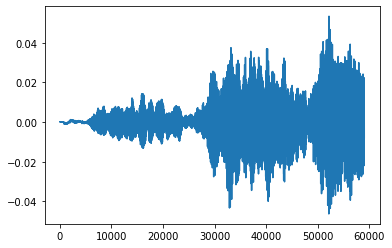

In [18]:
song,fs=librosa.load('/Users/noelalben/Desktop/VTU_PROJ/music_autotagging/songs_in_order/35.mp3')
song=song[0:59049]
song1=np.array(song)
song1=song1.reshape(1,59049,1)
song1.shape
plt.plot(song)



In [19]:
predi=classifier.predict(song1)
predi = np.where(predi>0.5,1,0)

### Our Sample CNN's prediction of tags for the loaded audio

In [31]:
predi

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

## EVALUATING OUR PREDICTION

### Original Dataset audio tags

In [21]:
  df = pd.read_csv("/Users/noelalben/Desktop/VTU_PROJ/music_autotagging/annotations_final.csv", delimiter='\t')

  # Calculate TOP 50 tags.
  top50 = (df.drop(['clip_id', 'mp3_path'], axis=1)
    .sum()
    .sort_values()
    .tail(50)
    .index
    .tolist())

  # Select TOP 50 columns.
  df = df[top50]
  y=df
  y

,choral,female voice,metal,country,weird,no voice,cello,harp,beats,female vocal,...,piano,fast,rock,electronic,drums,strings,techno,slow,classical,guitar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
25859,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
25860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
25861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


### Extracting 35th song tags

In [22]:
z=y[35:36]
z.to_numpy()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

### Comparing model prediction with Dataset Tags

In [29]:
comparison = predi == z 
equal_arrays = comparison.all() 
  
print(equal_arrays)

choral          True
female voice    True
metal           True
country         True
weird           True
no voice        True
cello           True
harp            True
beats           True
female vocal    True
male voice      True
dance           True
new age         True
voice           True
choir           True
classic         True
man             True
solo            True
sitar           True
soft            True
pop             True
no vocal        True
male vocal      True
woman           True
flute           True
quiet           True
loud            True
harpsichord     True
no vocals       True
vocals          True
singing         True
male            True
opera           True
indian          True
female          True
synth           True
vocal           True
violin          True
beat            True
ambient         True
piano           True
fast            True
rock            True
electronic      True
drums           True
strings         True
techno          True
slow         